<a href="https://colab.research.google.com/github/Arta-DS/py_analytics_HWs/blob/main/%D0%9F%D0%BE%D0%B8%D1%81%D0%BA_%D0%B0%D0%BD%D0%BE%D0%BC%D0%B0%D0%BB%D0%B8%D0%B9_%D0%B2_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%B8_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%BF%D1%80%D0%BE%D0%BF%D1%83%D1%89%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8_%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D1%8F%D0%BC%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание 1**.

Загрузка данных

In [ ]:
import pandas as pd

df = pd.read_csv('horse_data.csv', na_values=['?','NaN'], header=0,
                 names=['surgery?','Age','Hospital Number',
                        'rectal temperature', 'pulse','respiratory rate',
                        'temperature of extremities','peripheral pulse',
                        'mucous membranes','capillary refill time','pain',
                        'peristalsis', 'abdominal distension',
                        'nasogastric tube', 'nasogastric reflux',
                        'nasogastric reflux PH', 'rectal examination',
                        'abdomen', 'packed cell volume', 'total protein',
                        'abdominocentesis appearance',
                        'abdomcentesis total protein','outcome',
                        'surgical lesion?', 'type of lesion1',
                        'type of lesion2','type of lesion3', 'cp_data'],
                 usecols=['surgery?', 'Age', 'rectal temperature', 'pulse',
                          'respiratory rate', 'temperature of extremities',
                          'pain', 'outcome'])
df.head()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
1,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
2,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
3,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
4,2.0,1,NaN,NaN,NaN,2.0,2.0,1.0


**Задание 2.**

Анализ данных, поиск выбросов

In [ ]:
# В столбце Age есть значения 9, которые лежат вне интервала
# возможных значений (1, 2). Можно предположить, что это неправильное
# распознавание значения 2, т.к. 2 в датафрейме вообще изначально нет,
# согласно описанию данных 2.

df['Age']=df['Age'].replace(9,2)
df.head()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
1,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
2,1.0,2,39.1,164.0,84.0,4.0,2.0,2.0
3,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
4,2.0,1,NaN,NaN,NaN,2.0,2.0,1.0


In [ ]:
# Вычисление базовых статистик для столбца 'rectal temperature'
rectal_temperature_stats = df['rectal temperature'].describe()
rectal_temperature_stats

count    239.000000
mean      38.166527
std        0.733508
min       35.400000
25%       37.800000
50%       38.200000
75%       38.500000
max       40.800000
Name: rectal temperature, dtype: float64

In [ ]:
# Применение межквартильного размаха для поиска выбросов для 'rectal temperature'
q1 = df['rectal temperature'].quantile(0.25)
q3 = df['rectal temperature'].quantile(0.75)
iqr_rectal_temperature = q3 - q1
lower_bound_rectal_temperature = q1 - (1.5 * iqr_rectal_temperature)
upper_bound_rectal_temperature = q3 + (1.5 * iqr_rectal_temperature)
remove_outliers_rectal_temperature = df[df['rectal temperature'].between(lower_bound_rectal_temperature, upper_bound_rectal_temperature, inclusive='both')]
iqr_rectal_temperature

0.7000000000000028

In [ ]:
# Фильтрация выбросов для 'rectal temperature'
outliers_rectal_temperature = df[(df['rectal temperature'] > upper_bound_rectal_temperature) | (df['rectal temperature'] < lower_bound_rectal_temperature)]
outliers_rectal_temperature

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
19,1.0,1,39.9,72.0,60.0,1.0,5.0,1.0
43,1.0,1,35.4,140.0,24.0,3.0,4.0,3.0
53,2.0,1,40.3,114.0,36.0,3.0,2.0,3.0
74,1.0,2,39.7,100.0,NaN,3.0,2.0,3.0
79,1.0,1,36.4,98.0,35.0,3.0,4.0,2.0
90,2.0,1,40.3,114.0,36.0,3.0,2.0,2.0
98,2.0,1,39.6,108.0,51.0,3.0,2.0,1.0
117,1.0,1,36.5,78.0,30.0,1.0,5.0,1.0
140,2.0,1,36.0,42.0,30.0,NaN,NaN,2.0
237,2.0,1,36.1,88.0,NaN,3.0,3.0,3.0


Средняя температура 38.166527 °С

Стандартное отклонение 0.733508 °С

min 35.4 °С
max 40.8 °С


Температура тела (ректальная) у взрослой лошади – 37,5 – 38,5 °С . Она изменяется в зависимости от возраста, времени суток, характера питания, работы, физиологического состояния организма. Так, у молодых лошадей температура тела несколько выше.

- Из-за инфекции может наблюдаться повышение температуры.
- температура может снижаться, когда животное находится в состоянии позднего шока
- нормальная температура составляет 37,8 °С
- этот параметр обычно изменяется по мере прогрессирования проблемы
, например, сначала может быть нормальным, затем повышаться из-за повреждения и возвращаться к норме, когда лошадь впадает в шоковое состояние


Есть выбросы. Например 40.3 °С, что на 2,133473 °С выше средней температуры, что может быть результатом инфекции, шока, операции.

In [ ]:
# Вычисление базовых статистик для столбца 'pulse'
pulse_stats = df['pulse'].describe()
pulse_stats

count    275.000000
mean      71.934545
std       28.680522
min       30.000000
25%       48.000000
50%       64.000000
75%       88.000000
max      184.000000
Name: pulse, dtype: float64

In [ ]:
# Применение межквартильного размаха для поиска выбросов для 'pulse'
iqr_pulse = pulse_stats['75%'] - pulse_stats['25%']
upper_bound_pulse = pulse_stats['75%'] + 1.5  *  iqr_pulse
lower_bound_pulse = pulse_stats['25%'] - 1.5  *  iqr_pulse
iqr_pulse

40.0

In [ ]:
# Фильтрация выбросов для 'pulse'
outliers_pulse = df[(df['pulse'] > upper_bound_pulse) | (df['pulse'] < lower_bound_pulse)]
outliers_pulse

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
2,1.0,2,39.1,164.0,84.0,4.0,2.0,2.0
40,2.0,2,39.0,150.0,72.0,NaN,NaN,1.0
54,1.0,2,38.6,160.0,20.0,3.0,3.0,2.0
254,1.0,2,38.8,184.0,84.0,1.0,4.0,2.0
274,1.0,2,38.8,150.0,50.0,1.0,5.0,2.0


Средний пульс, согласно представленным данным, 71.934545.

Стандартное отклонение равно 28.680522

min 30.0, max 184.0.

 Средний пульс взрослой лошади в состоянии покоя составляет 30-40 ударов в минуту - это норма для взрослых
 - частота сердечных сокращений редко бывает ниже нормы, хотя у спортивных лошадей
она может составлять 20-25
 - у животных с болезненными повреждениями или страдающих от сердечно-сосудистого шока
может быть повышенная частота сердечных сокращений.

Частота сердечных сокращений также может увеличиваться, когда лошадь возбуждена, перегрелась или страдает от сильного обезвоживания, у нее высокая температура, инфекция или сепсис, большая кровопотеря, прогрессирующие заболевания сердца или легких или она находится в шоке. В этих случаях частота сердечных сокращений в состоянии покоя у взрослого животного может превышать 80
У молодых жеребят пульс в состоянии покоя выше, чем у взрослых лошадей, Например у 2-4-недельного жеребенка обычно пульс составляет от 70 до 90 ударов в минуту.

Выбросы в данных присутствуют. Например, значение 164.0	 является выбросом, так как оно превышает верхнюю границу интерквартильного размаха (IQR) на 52.065455. Это может быть результатом инфекции, шока и возраста жеребенка.

Межквартильный размах 40, что говорит о большой разрозненности данных

In [ ]:
# Вычисление базовых статистик для столбца 'respiratory rate'
respiratory_rate_stats = df['respiratory rate'].describe()
respiratory_rate_stats

count    241.000000
mean      30.427386
std       17.678256
min        8.000000
25%       18.000000
50%       24.000000
75%       36.000000
max       96.000000
Name: respiratory rate, dtype: float64

In [ ]:
# Применение межквартильного размаха для поиска выбросов для 'respiratory rate'
iqr_respiratory_rate = respiratory_rate_stats['75%'] - respiratory_rate_stats['25%']
upper_bound_respiratory_rate = respiratory_rate_stats['75%'] + 1.5  *  iqr_respiratory_rate
lower_bound_respiratory_rate = respiratory_rate_stats['25%'] - 1.5  *  iqr_respiratory_rate
iqr_respiratory_rate

18.0

In [ ]:
# Фильтрация выбросов для 'respiratory rate'
outliers_respiratory_rate = df[(df['respiratory rate'] > upper_bound_respiratory_rate) | (df['respiratory rate'] < lower_bound_respiratory_rate)]
outliers_respiratory_rate

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
2,1.0,2,39.1,164.0,84.0,4.0,2.0,2.0
38,1.0,2,39.2,146.0,96.0,NaN,NaN,2.0
40,2.0,2,39.0,150.0,72.0,NaN,NaN,1.0
81,1.0,2,38.1,100.0,80.0,3.0,3.0,1.0
83,1.0,1,37.8,60.0,80.0,1.0,2.0,1.0
102,1.0,2,38.0,140.0,68.0,1.0,3.0,1.0
105,1.0,1,38.3,52.0,96.0,NaN,NaN,1.0
119,1.0,1,39.4,54.0,66.0,1.0,2.0,1.0
124,1.0,1,38.0,42.0,68.0,4.0,3.0,1.0
185,1.0,1,39.3,64.0,90.0,2.0,NaN,1.0


Средняя частота дыхания, согласно представленным данным, 30.427386.

Стандартное отклонение равно 17.678256

min ЧД 8.0
max ЧД 96.0

Средняя частота дыхания взрослой лошади в состоянии покоя составляет от 12 до 24 вдохов в минуту.

В пояснении к данным указан диапазон 8-10(???)

У молодых жеребят частота дыхания в состоянии покоя выше, чем у взрослых лошадей, обычно от 36 до 40 вдохов в минуту.

Выбросы в данных присутствуют. Например, значение 90 является выбросом, так как оно превышает верхнюю границу интерквартильного размаха (IQR) на 41,572617. Это может быть результатом каких-то особых условий, которые повлияли на животное. Жара и влажность могут значительно повысить частоту дыхания, особенно если у лошади темная шерсть и она находится на солнце. Дыхание часто меняется, если лошадь возбуждается или испытывает беспокойство.

In [ ]:
df['surgery?'].mode()[0]

1.0

In [ ]:
df['surgery?'].value_counts()

surgery?
1.0    180
2.0    118
Name: count, dtype: int64

In [ ]:
df['surgery?'].unique()

array([ 1.,  2., nan])

In [ ]:
df['Age'].mode()[0]

1

In [ ]:
df['Age'].value_counts()

Age
1    275
2     24
Name: count, dtype: int64

In [ ]:
df['Age'].unique()

array([1, 2])

In [ ]:
df['temperature of extremities'].mode()[0]

3.0

In [ ]:
df['temperature of extremities'].value_counts()

temperature of extremities
3.0    108
1.0     78
2.0     30
4.0     27
Name: count, dtype: int64

In [ ]:
df['temperature of extremities'].unique()

array([nan,  1.,  4.,  2.,  3.])

In [ ]:
df['pain'].mode()[0]

3.0

In [ ]:
df['pain'].value_counts()

pain
3.0    67
2.0    59
5.0    41
4.0    39
1.0    38
Name: count, dtype: int64

In [ ]:
df['pain'].unique()

array([ 3.,  2., nan,  4.,  5.,  1.])

In [ ]:
df['outcome'].mode()[0]

1.0

In [ ]:
df['outcome'].value_counts()

outcome
1.0    178
2.0     76
3.0     44
Name: count, dtype: int64

In [ ]:
df['outcome'].unique()

array([ 3.,  1.,  2., nan])

**Задание 3.**

Замена пропусков

In [ ]:
df.corr()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
surgery?,1.000000,-0.088337,0.038550,-0.186473,-0.201346,-0.119927,-0.326395,-0.120514
Age,-0.088337,1.000000,0.197540,0.529741,0.412198,-0.056107,0.036807,-0.003482
rectal temperature,0.038550,0.197540,1.000000,0.219680,0.269650,0.095171,-0.093028,-0.058447
pulse,-0.186473,0.529741,0.219680,1.000000,0.470341,0.336046,0.311020,0.313903
respiratory rate,-0.201346,0.412198,0.269650,0.470341,1.000000,0.106460,0.130333,0.063455
temperature of extremities,-0.119927,-0.056107,0.095171,0.336046,0.106460,1.000000,0.276474,0.354365
pain,-0.326395,0.036807,-0.093028,0.311020,0.130333,0.276474,1.000000,0.307807
outcome,-0.120514,-0.003482,-0.058447,0.313903,0.063455,0.354365,0.307807,1.000000


In [ ]:
# Статистика до заполнения пропусков
df.describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,298.000000,299.000000,239.000000,275.000000,241.000000,243.000000,244.000000,298.000000
mean,1.395973,1.080268,38.166527,71.934545,30.427386,2.345679,2.942623,1.550336
std,0.489881,0.272162,0.733508,28.680522,17.678256,1.046369,1.303993,0.737967
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,18.000000,1.000000,2.000000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,24.000000,3.000000,3.000000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,4.000000,2.000000
max,2.000000,2.000000,40.800000,184.000000,96.000000,4.000000,5.000000,3.000000


In [ ]:
df['rectal temperature'].fillna(df.groupby('surgery?')['rectal temperature'].transform('median'), inplace=True)
df['pulse'].fillna(df.groupby('Age')['pulse'].transform('median'), inplace=True)
df['respiratory rate'].fillna(df.groupby('Age')['respiratory rate'].transform('median'), inplace=True)
df['surgery?'].fillna(df.groupby('pain')['surgery?'].transform(lambda x: x.mode()[0]), inplace=True)
df['temperature of extremities'].fillna(df.groupby('outcome')['temperature of extremities'].transform(lambda x: x.mode()[0]), inplace=True)
df['pain'].fillna(df.groupby('surgery?')['pain'].transform(lambda x: x.mode()[0]), inplace=True)
df['outcome'].fillna(df.groupby('temperature of extremities')['outcome'].transform(lambda x: x.mode()[0]), inplace=True)
df.head()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,1.0,1,39.2,88.0,20.0,3.0,3.0,3.0
1,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
2,1.0,2,39.1,164.0,84.0,4.0,2.0,2.0
3,2.0,1,37.3,104.0,35.0,3.0,1.0,2.0
4,2.0,1,38.2,60.0,24.0,2.0,2.0,1.0


In [ ]:
# Вычисление базовых статистик после заполнения пропусков
df.describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,1.394649,1.080268,38.159866,71.404682,29.515050,2.254181,2.832776,1.551839
std,0.489595,0.272162,0.655996,28.013422,16.216518,1.053410,1.266023,0.737187
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,37.900000,48.000000,20.000000,1.000000,2.000000,1.000000
50%,1.000000,1.000000,38.100000,60.000000,24.000000,3.000000,3.000000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,4.000000,2.000000
max,2.000000,2.000000,40.800000,184.000000,96.000000,4.000000,5.000000,3.000000


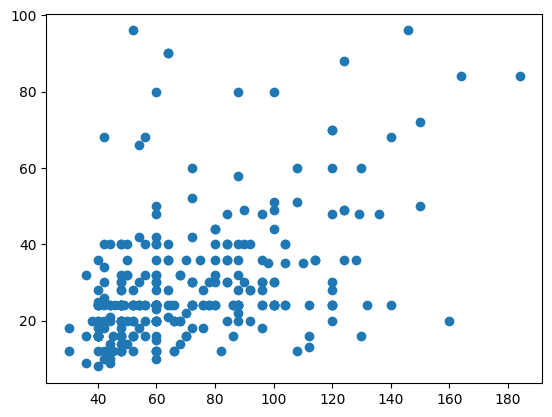

In [ ]:
import matplotlib.pyplot as plt

x = df['pulse']
y = df['respiratory rate']
plt.scatter(x,y)